In [1]:
import os
import sys

src_dir = os.path.abspath('../src')
if src_dir not in sys.path:
    sys.path.append(src_dir)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import seaborn as sns

from ann_solo import reader, util

In [3]:
# plot styling
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='serif')
sns.set_palette('Set1')
sns.set_context('paper', font_scale=1.3)    # single-column figure

In [4]:
fdr = 0.1
tol_mass = 0.1
tol_mode = 'Da'

psms_dir = '../data/processed/iprg2012/brute_force'
psms_closed = util.filter_fdr(
    reader.read_mztab_psms(os.path.join(psms_dir, 'bf_closed.mztab')),
    fdr)
psms_oms = util.filter_group_fdr(
    reader.read_mztab_psms(os.path.join(psms_dir, 'bf_oms.mztab')),
    fdr, tol_mass, tol_mode)
psms_oms_shifted = util.filter_group_fdr(
    reader.read_mztab_psms(os.path.join(psms_dir, 'bf_oms_shifted.mztab')),
    fdr, tol_mass, tol_mode)

/Users/Wout/.conda/envs/ann-solo/lib/python3.6/site-packages/pyteomics/auxiliary.py:661: RuntimeWarning: divide by zero encountered in true_divide
  q = tfalse / (ind - cumsum) / ratio


In [5]:
psms = [('20 ppm', psms_closed),
        ('300 Da (dot)', psms_oms),
        ('300 Da (shifted dot)', psms_oms_shifted)]

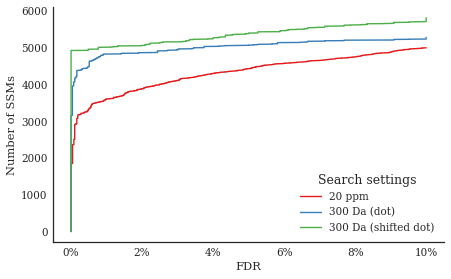

In [6]:
width = 7
height = width / 1.618    # golden ratio
fig, ax = plt.subplots(figsize=(width, height))

for label, psm in psms:
    ax.plot(np.append(psm['q'], fdr) * 100, range(len(psm) + 1), label=label)

ax.set_xlabel('FDR')
ax.set_ylabel('Number of SSMs')

ax.xaxis.set_major_formatter(mticker.PercentFormatter(decimals=0))

ax.legend(loc='lower right', title='Search settings')

sns.despine()

plt.savefig('fdr.pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()